# Lab
 This notebook provides a flow similar to that given in the Lab.docx for those who want to do things using code. The 4 sections of is notebook are: 
 * Profiling and Visualization
 * Refining
 * Model Seleciton
 * Deployment

## Get the Data

In [1]:
import pandas as pd

try:
    #Execute this if in IBM Cloud
    import sys
    import types
    from ibm_botocore.client import Config
    import ibm_boto3

    def __iter__(self): return 0

    # @hidden_cell
    # The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
    # You might want to remove those credentials before you share your notebook.
    client_e2d075cec16c44dab5d82df6c09d8e7b = ibm_boto3.client(service_name='s3',
        ibm_api_key_id='_ZfadsG3wcHxClg_P9sBLnPTfYBlvNoHMcgmV2wgAHfj',
        ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
        config=Config(signature_version='oauth'),
        endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

    body = client_e2d075cec16c44dab5d82df6c09d8e7b.get_object(Bucket='enablement-donotdelete-pr-05xhw0i4ihc5lr',Key='employees.csv')['Body']
    # add missing __iter__ method, so pandas accepts body as file-like object
    if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

except:
    #Execute this if in Local, make sure the Employees.csv file is in the same directory
    body = 'employees.csv'
    
df_data_1 = pd.read_csv(body)
df_data_1.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
df_data_1.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [3]:
df_data_1.shape

(1470, 35)

## Profiling
In this section, we will use the built in Pandas functions to understand the data and then use Matplotlib to visualize
### Statistics

In [4]:
print(df_data_1.shape)
df_data_1.describe()

(1470, 35)


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Unique Values

In [5]:
df_data_1.T.apply(lambda x: x.nunique(), axis=1)

Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
column_name = input('Which column do you want to visualize: ')

Which column do you want to visualize:  JobLevel


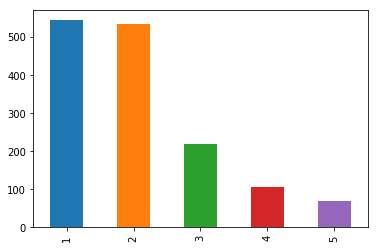

In [9]:
df_data_1[column_name].value_counts().plot(kind='bar')

### Missing values

In [10]:
print('Columns with more than one missing value')
empty = df_data_1.isnull().sum()
empty[empty>0]

Columns with more than one missing value


MaritalStatus    9
dtype: int64

### Correlation

In [11]:
df_data_1.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


Correlation with a particular column

In [12]:
column_name = input('Which column do you want to calculate the correlation for: ')
df_data_1.corr()[str(column_name)]

Which column do you want to calculate the correlation for:  Age


Age                         1.000000
DailyRate                   0.010661
DistanceFromHome           -0.001686
Education                   0.208034
EmployeeCount                    NaN
EmployeeNumber             -0.010145
EnvironmentSatisfaction     0.010146
HourlyRate                  0.024287
JobInvolvement              0.029820
JobLevel                    0.509604
JobSatisfaction            -0.004892
MonthlyIncome               0.497855
MonthlyRate                 0.028051
NumCompaniesWorked          0.299635
PercentSalaryHike           0.003634
PerformanceRating           0.001904
RelationshipSatisfaction    0.053535
StandardHours                    NaN
StockOptionLevel            0.037510
TotalWorkingYears           0.680381
TrainingTimesLastYear      -0.019621
WorkLifeBalance            -0.021490
YearsAtCompany              0.311309
YearsInCurrentRole          0.212901
YearsSinceLastPromotion     0.216513
YearsWithCurrManager        0.202089
Name: Age, dtype: float64

## Refining
In this section, we will use the built in Pandas functions to clean up the data and prepare it for modelling.

### Mask employeeID

In [13]:
from random import sample, randint, seed

seed(0)
df_masked = df_data_1.copy()
df_masked['EmployeeNumber'] = df_masked['EmployeeNumber'].apply(lambda x: randint(1000, 100000)+int(x + randint(1000, 100000)))
df_masked.set_index('EmployeeNumber', inplace=True)
df_masked.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
107620,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
41244,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
132708,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
94835,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
111405,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


### Drop empty

In [14]:
df_no_empty = df_masked.dropna()
df_no_empty.shape

(1461, 34)

### Drop 0 variance

In [15]:
df_no_var = df_no_empty.loc[:,df_no_empty.apply(pd.Series.nunique) != 1]
df_no_var.shape

(1461, 31)

## Modelling

We will use the same models in WML and compare the results. However he have to manually encode the data into numbers. 

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

Use Pandas' built in get_dummies to encode all the categorical variables (strings) to numbers. We will keep numeric categorical variables as integers since they are all ordinal numbers

In [17]:
data = pd.get_dummies(df_no_var)
data.drop(columns=['Attrition_No'], inplace=True)
print(data.shape)
data.head()

(1461, 52)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
107620,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
41244,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
132708,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
94835,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
111405,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0


train test split and x-y split (70-30)

In [18]:
X = data.drop(columns=['Attrition_Yes'])
Y = data['Attrition_Yes']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Train All Classifiers
The next 4 cells won't show any output

### Logistic Regression Classifier

In [19]:
lr_classifier = LogisticRegression()
y_pred_lr = lr_classifier.fit(x_train, y_train).predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Decision Tree

In [20]:
tree_classifier = DecisionTreeClassifier()
y_pred_tree = tree_classifier.fit(x_train, y_train).predict(x_test)

### Random Forest

In [21]:
forest_classifer = RandomForestClassifier()
y_pred_forest = tree_classifier.fit(x_train, y_train).predict(x_test)

### Gradient Boosting Tree

In [22]:
gbt_classifer = GradientBoostingClassifier()
y_pred_gbt = tree_classifier.fit(x_train, y_train).predict(x_test)

# Compare the results
calculate the metrics for each output and finally show the results

In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

In [24]:
a_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
lr_res = {'acc': a_lr, 'auc':auc_lr, 'f1':f1_lr}

In [25]:
a_tree = accuracy_score(y_test, y_pred_tree)
auc_tree = roc_auc_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
tree_res = {'acc': a_tree, 'auc':auc_tree, 'f1':f1_tree}

In [26]:
a_forest = accuracy_score(y_test, y_pred_forest)
auc_forest = roc_auc_score(y_test, y_pred_forest)
f1_forest = f1_score(y_test, y_pred_forest)
forest_res = {'acc': a_forest, 'auc':auc_forest, 'f1':f1_forest}

In [27]:
a_gbt = accuracy_score(y_test, y_pred_gbt)
auc_gbt = roc_auc_score(y_test, y_pred_gbt)
f1_gbt = f1_score(y_test, y_pred_gbt)
gbt_res = {'acc': a_gbt, 'auc':auc_gbt, 'f1':f1_gbt}

In [31]:
d = [lr_res, tree_res, forest_res, gbt_res]
idx = ['LR', 'Decision Tree', 'Random Forest', 'Gradient Boost Tree']
columns = ['Accuracy', 'AUC', 'F1']
results = pd.DataFrame(data=d, index=idx)
results.columns=columns

In [32]:
results

,Accuracy,AUC,F1
LR,0.881549,0.626942,0.395349
Decision Tree,0.760820,0.556463,0.244604
Random Forest,0.772210,0.596146,0.305556
Gradient Boost Tree,0.772210,0.582932,0.285714
